# Interpretation the selected features

Druggable proteins selected features

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# remove warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,f1_score, recall_score, precision_score
from sklearn.utils import class_weight

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel, SelectPercentile, f_classif

import seaborn as sns; sns.set() # data visualization library 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from imblearn.over_sampling import SMOTE

from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold
import numpy as np

import pandas as pd
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals import joblib

print(__doc__)

2024-06-08 15:36:39,541 [6108] WARNING  py.warnings:110: [JupyterRequire] c:\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)



Automatically created module for IPython interactive environment


In [2]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [3]:
import joblib

In [87]:
# selected features
SelFeats = ['NRA', 'QRA', 'INA', 'MCA', 'YEA', 'THA', 'CSA', 'VYA', 'KNR', 'WDR', 'TER', 'PQR',
            'YGR', 'EHR', 'LIR', 'VSR', 'ERN', 'MDN', 'SDN', 'LHN', 'YIN', 'FFN', 'RSN', 'QSN',
            'FWN', 'ACD', 'WCD', 'MED', 'CHD', 'SHD', 'MLD', 'SMD', 'WPD', 'SSD', 'HTD', 'DWD',
            'VYD', 'KNC', 'NDC', 'IHC', 'VHC', 'GYC', 'MCE', 'NHE', 'ALE', 'HME', 'LPE', 'AWE', 
            'EYE', 'QYE', 'GVE', 'FVE', 'SAQ', 'FNQ', 'MDQ', 'PCQ', 'WEQ', 'RQQ', 'NGQ', 'HLQ', 
            'RMQ', 'DFQ', 'GPQ', 'DSQ', 'YSQ', 'AWQ', 'RVQ', 'QRG', 'HGG', 'TGG', 'KLG', 'NKG', 
            'FPG', 'SSG', 'RTG', 'PTG', 'IVG', 'CDH', 'FDH', 'PDH', 'TQH', 'KHH', 'FHH', 'IFH', 
            'NSH', 'WSH', 'FWH', 'WRI', 'NDI', 'EDI', 'FEI', 'WEI', 'WQI', 'MGI', 'PMI', 'AAL',
            'EKL', 'IKL', 'FKL', 'GPL', 'ESL', 'DVL', 'MVL', 'VVL', 'GNK', 'HNK', 'HDK', 'HCK', 
            'EQK', 'DHK', 'QLK', 'EKK', 'SMK', 'FFK', 'QSK', 'EWK', 'AVK', 'WRM', 'WNM', 'REM',
            'WQM', 'SHM', 'LLM', 'SMM', 'NFM', 'TSM', 'RWM', 'GYM', 'KYM', 'VYM', 'HVM', 'IVM', 
            'LDF', 'YQF', 'NGF', 'HGF', 'FWF', 'FAP', 'FNP', 'PEP', 'SQP', 'QGP', 'VHP', 'PLP', 
            'HKP', 'NPP', 'QPP', 'STP', 'TTP', 'KWP', 'YWP', 'SRS', 'HDS', 'WDS', 'HCS', 'LES',
            'DHS', 'SHS', 'PSS', 'SSS', 'LWS', 'LAT', 'DRT', 'GRT', 'IRT', 'INT', 'VQT', 'NLT',
            'CLT', 'KKT', 'YTT', 'QWT', 'FYT', 'KCW', 'QGW', 'VGW', 'MIW', 'IKW', 'RFW', 'DFW',
            'HVW', 'KVW', 'NRY', 'CHY', 'DMY', 'YPY', 'YAV', 'SRV', 'ENV', 'HNV', 'GEV', 'QGV',
            'HGV', 'TGV', 'WHV', 'LLV', 'IMV', 'DSV', 'TSV', 'QYV']
print(len(SelFeats))

200


In [106]:
print(SelFeats)

['NRA', 'QRA', 'INA', 'MCA', 'YEA', 'THA', 'CSA', 'VYA', 'KNR', 'WDR', 'TER', 'PQR', 'YGR', 'EHR', 'LIR', 'VSR', 'ERN', 'MDN', 'SDN', 'LHN', 'YIN', 'FFN', 'RSN', 'QSN', 'FWN', 'ACD', 'WCD', 'MED', 'CHD', 'SHD', 'MLD', 'SMD', 'WPD', 'SSD', 'HTD', 'DWD', 'VYD', 'KNC', 'NDC', 'IHC', 'VHC', 'GYC', 'MCE', 'NHE', 'ALE', 'HME', 'LPE', 'AWE', 'EYE', 'QYE', 'GVE', 'FVE', 'SAQ', 'FNQ', 'MDQ', 'PCQ', 'WEQ', 'RQQ', 'NGQ', 'HLQ', 'RMQ', 'DFQ', 'GPQ', 'DSQ', 'YSQ', 'AWQ', 'RVQ', 'QRG', 'HGG', 'TGG', 'KLG', 'NKG', 'FPG', 'SSG', 'RTG', 'PTG', 'IVG', 'CDH', 'FDH', 'PDH', 'TQH', 'KHH', 'FHH', 'IFH', 'NSH', 'WSH', 'FWH', 'WRI', 'NDI', 'EDI', 'FEI', 'WEI', 'WQI', 'MGI', 'PMI', 'AAL', 'EKL', 'IKL', 'FKL', 'GPL', 'ESL', 'DVL', 'MVL', 'VVL', 'GNK', 'HNK', 'HDK', 'HCK', 'EQK', 'DHK', 'QLK', 'EKK', 'SMK', 'FFK', 'QSK', 'EWK', 'AVK', 'WRM', 'WNM', 'REM', 'WQM', 'SHM', 'LLM', 'SMM', 'NFM', 'TSM', 'RWM', 'GYM', 'KYM', 'VYM', 'HVM', 'IVM', 'LDF', 'YQF', 'NGF', 'HGF', 'FWF', 'FAP', 'FNP', 'PEP', 'SQP', 'QGP', 'VHP'

In [88]:
# Define a dictionary to store the amino acid frequencies
amino_acid_freq = {}

# Iterate through the tri-amino acid groups and count the frequency of each amino acid
for tri_amino_acid in SelFeats:
    for amino_acid in tri_amino_acid:
        if amino_acid in amino_acid_freq:
            amino_acid_freq[amino_acid] += 1
        else:
            amino_acid_freq[amino_acid] = 1

# Print the frequency of each amino acid
for amino_acid, freq in amino_acid_freq.items():
    print(f"{amino_acid}: {freq}")

# Calculate the total number of amino acids
total_amino_acids = sum(amino_acid_freq.values())

# Calculate the average frequency of amino acids
average_freq = total_amino_acids / len(amino_acid_freq)

print(f"Average frequency of amino acids: {average_freq}")

# Calculate the most common amino acid
most_common_amino_acid = max(amino_acid_freq, key=amino_acid_freq.get)

print(f"Most common amino acid: {most_common_amino_acid}")

# Calculate the least common amino acid
least_common_amino_acid = min(amino_acid_freq, key=amino_acid_freq.get)

print(f"Least common amino acid: {least_common_amino_acid}")


N: 32
R: 28
A: 19
Q: 36
I: 21
M: 32
C: 18
Y: 23
E: 30
T: 26
H: 42
S: 42
V: 35
K: 30
W: 34
D: 36
P: 30
G: 31
L: 28
F: 27
Average frequency of amino acids: 30.0
Most common amino acid: H
Least common amino acid: C


In [92]:
# Convert the dictionary to a DataFrame
amino_acid_freq_df = pd.DataFrame(list(amino_acid_freq.items()), columns=['A', 'Frequency'])

In [93]:
# Order the DataFrame by the 'Frequency' column in descending order
amino_acid_freq_df = amino_acid_freq_df.sort_values(by='Frequency', ascending=False)

In [94]:
amino_acid_freq_df

,A,Frequency
10,H,42
11,S,42
15,D,36
3,Q,36
12,V,35
14,W,34
0,N,32
5,M,32
17,G,31
8,E,30


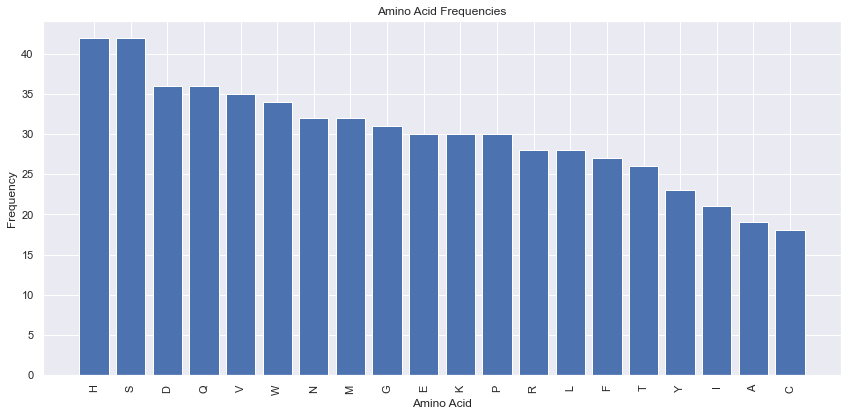

In [95]:
import matplotlib.pyplot as plt

# Extract the amino acids and frequencies
amino_acids = amino_acid_freq_df['A']
frequencies = amino_acid_freq_df['Frequency']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(amino_acids, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Frequencies')
plt.tight_layout()
plt.show()


In [96]:
amino_acid_freq_df

,A,Frequency
10,H,42
11,S,42
15,D,36
3,Q,36
12,V,35
14,W,34
0,N,32
5,M,32
17,G,31
8,E,30


In [97]:
# Create a dictionary mapping one-letter to three-letter amino acid notations
amino_acid_map = {
    'A': 'Ala', 'C': 'Cys', 'D': 'Asp', 'E': 'Glu', 'F': 'Phe', 'G': 'Gly', 
    'H': 'His', 'I': 'Ile', 'K': 'Lys', 'L': 'Leu', 'M': 'Met', 'N': 'Asn', 
    'P': 'Pro', 'Q': 'Gln', 'R': 'Arg', 'S': 'Ser', 'T': 'Thr', 'V': 'Val', 
    'W': 'Trp', 'Y': 'Tyr'
}

# Add a new column with three-letter amino acid notations
amino_acid_freq_df['AAA'] = amino_acid_freq_df['A'].map(amino_acid_map)


In [98]:
amino_acid_freq_df

,A,Frequency,AAA
10,H,42,His
11,S,42,Ser
15,D,36,Asp
3,Q,36,Gln
12,V,35,Val
14,W,34,Trp
0,N,32,Asn
5,M,32,Met
17,G,31,Gly
8,E,30,Glu


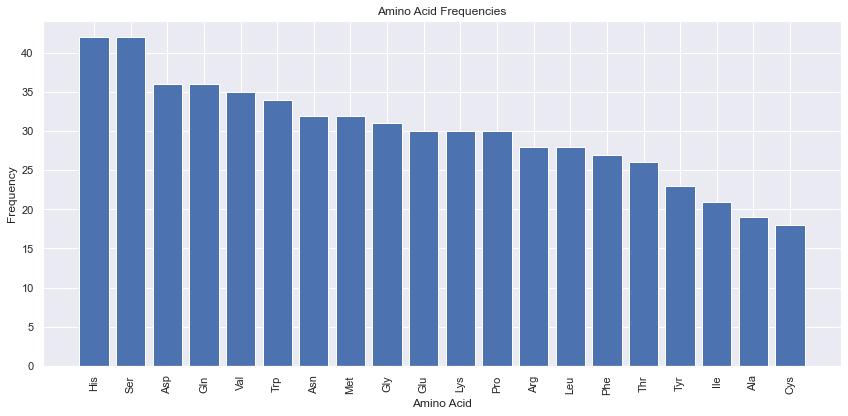

In [100]:
import matplotlib.pyplot as plt

# Extract the amino acids and frequencies
amino_acids = amino_acid_freq_df['AAA']
frequencies = amino_acid_freq_df['Frequency']

# Define the one-letter and three-letter amino acid codes
aa_one_letter = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
aa_three_letter = ['Ala', 'Cys', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Ile', 'Lys', 'Leu', 'Met', 'Asn', 'Pro', 'Gln', 'Arg', 'Ser', 'Thr', 'Val', 'Trp', 'Tyr']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(amino_acids, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Frequencies')


plt.tight_layout()
plt.show()


In [101]:
amino_acid_freq_df.describe()

,Frequency
count,20.000000
mean,30.000000
std,6.641179
min,18.000000
25%,26.750000
50%,30.000000
75%,34.250000
max,42.000000


In [103]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the amino_acid_freq_df dataframe
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the Frequency column
amino_acid_freq_df['Normalized Frequency'] = scaler.fit_transform(amino_acid_freq_df['Frequency'].values.reshape(-1, 1))

# Create the new dataframe with the normalized values
norm_amino_acid_freq_df = amino_acid_freq_df[['AAA', 'Frequency', 'Normalized Frequency']]

In [104]:
norm_amino_acid_freq_df

,AAA,Frequency,Normalized Frequency
10,His,42,1.000000
11,Ser,42,1.000000
15,Asp,36,0.750000
3,Gln,36,0.750000
12,Val,35,0.708333
14,Trp,34,0.666667
0,Asn,32,0.583333
5,Met,32,0.583333
17,Gly,31,0.541667
8,Glu,30,0.500000


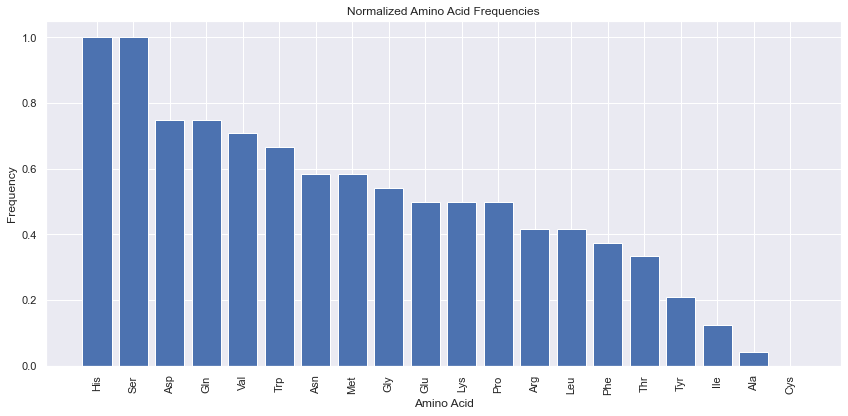

In [105]:
import matplotlib.pyplot as plt

# Extract the amino acids and frequencies
amino_acids = amino_acid_freq_df['AAA']
frequencies = amino_acid_freq_df['Normalized Frequency']

# Define the one-letter and three-letter amino acid codes
aa_one_letter = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
aa_three_letter = ['Ala', 'Cys', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Ile', 'Lys', 'Leu', 'Met', 'Asn', 'Pro', 'Gln', 'Arg', 'Ser', 'Thr', 'Val', 'Trp', 'Tyr']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(amino_acids, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Normalized Amino Acid Frequencies')


plt.tight_layout()
plt.show()
